In [50]:
import tensorflow as tf
import numpy as np

In [51]:
learning_rate = 0.1
display_step = 50
epochs = 10000

In [52]:
# Load data
data = np.load('data_with_labels.npz')
train = data['arr_0']/255.
labels = data['arr_1']

In [53]:
# Look at some data
print(train.shape)
print(labels.shape)

(2790, 36, 36)
(2790,)


In [80]:
train.reshape([-1,1296]).shape

(2790, 1296)

0
0
0
0
0
0
0
0
0


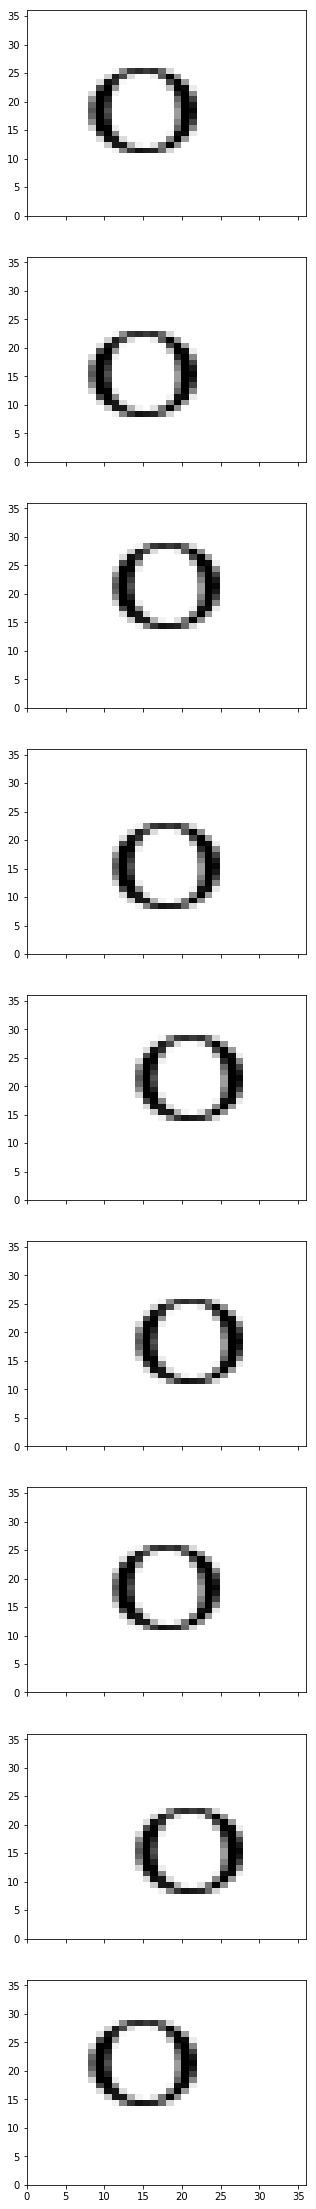

In [90]:
# If you have matplotlib installed
import matplotlib.pyplot as plt
plt.ion()

# Let's look at a subplot of one of A in each font
f, plts = plt.subplots(9, sharex=True, figsize=(5,40))
c = 0
for i in range(9):
    plts[i].pcolor(train[c+i], cmap=plt.cm.gray_r)
    print (labels[c+i])

In [43]:
def to_onehot(labels,nclasses = 5):
    '''
    Convert labels to "one-hot" format.
    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

In [44]:
onehot = to_onehot(labels)
print (onehot)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]


In [45]:
# Split data into training and validation
indices = np.random.permutation(train.shape[0])
print (indices)
valid_cnt = int(train.shape[0] * 0.1)
print (valid_cnt)

[1606    3  516 ..., 1420 1314 1078]
279


In [46]:
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:], onehot[training_idx,:]

In [29]:
# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None,5])

# Variables
W = tf.Variable(tf.zeros([1296,5]))
b = tf.Variable(tf.zeros([5]))
# Define model
y = tf.nn.softmax(tf.matmul(x,W) + b)

# Climb on cross-entropy

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(cross_entropy)

# Just initialize
init = tf.global_variables_initializer()

In [30]:
sess = tf.Session()
sess.run(init) # reset values to wrong
# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Actually train
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in range(epochs):
    # Record summary data, and the accuracy
    #print ("epoch=", i, " ", sess.run([train_step,cross_entropy] , {x: train.reshape([-1,1296]), y_: onehot_train}))
    sess.run([train_step,cross_entropy] , {x: train.reshape([-1,1296]), y_: onehot_train})

    if i % 10 == 0:
        # Check accuracy on train set
        A = sess.run (accuracy, {x: train.reshape([-1,1296]),y_: onehot_train})
        #print (A)
        train_acc[i//10] = A
        # And now the validation set
        A = sess.run (accuracy, {x: test.reshape([-1,1296]), y_: onehot_test})
        #print (A)
        test_acc[i//10] = A
curr_W, curr_b, curr_cross_entropy = sess.run([W, b, cross_entropy], {x: train.reshape([-1,1296]), y_: onehot_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_cross_entropy))

W: [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]] b: [ 5.59245682 -0.76108783  5.10085011 -9.30478191 -0.62746114] loss: 0.37909


In [31]:
# Notice that accuracy flattens out
print(train_acc[-1])
print(test_acc[-1])

0.882915198803
0.724014341831


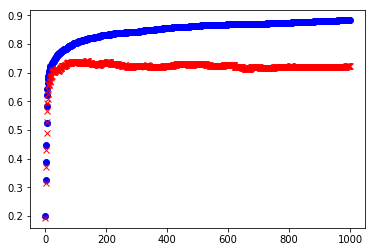

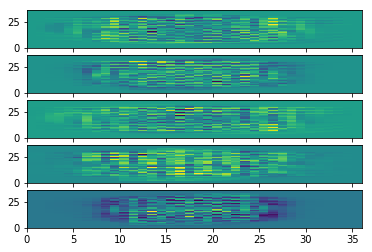

In [35]:
# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

In [ ]:
# Look at a subplot of the weights for each font
f, plts = plt.subplots(5, sharex=True)
for i in range(5):
    plts[i].pcolor(curr_W[:,i].reshape([36,36]))